# Práctica 2 - Belén Rodríguez Llorente & Octavian Rotita Ion

Librerías necesarias para realizar esta práctica:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from sklearn.linear_model import LinearRegression
import random

# Ejercicio 1

Dado el modelo:
$ y = \frac{\theta_1 \cdot \theta_2 \cdot (x_2 - x_3)}{1.632 (1 + \theta_2 \cdot x_1 +  \theta_3 \cdot x_2+\theta_4 \cdot x_3)} $

Realizar los siguientes pasos:

1. Linearizar el modelo y obtener una estimación inicial de los parámetros.
2. Con la estimación inicial anterior, resolver el problema de regresión no lineal minimizando el error cuadrático.
3. Calcular el error cuadrático medio y representarlo en el modelo original.

El archivo `isomerizacion.txt` contiene los datos necesarios para realizar el ajuste.


In [ ]:
# para no estar subiendo el archivo .txt con los datos del problema de la práctica, hemos creado un repositorio públicco de github con el dataset y lo clonamos:
!git clone https://github.com/belenllornte/Practica_2_MOPT.git

Cloning into 'Practica_2_MOPT'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
# Leemos el dataset isomerizacion.txt subido al repositorio:
df = pd.read_csv('Practica_2_MOPT/isomerizacion.txt', delim_whitespace=True)

# Verificamos los primeros registros y obeservamos que tiene 3 variables independientes (x1,x2,x3) y una variable dependiente (y)
print(df.head())

      x1     x2     x3      y
0  205.8   90.9   37.1  3.541
1  404.8   92.9   36.3  2.397
2  209.7  174.9   49.4  6.694
3  401.6  187.2   44.9  4.722
4  224.9   92.7  116.3  0.593


<ipython-input-3-3048c2a58923>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Practica_2_MOPT/isomerizacion.txt', delim_whitespace=True)


In [ ]:
# variables independientes:
x1 = df['x1'].values
x2 = df['x2'].values
x3 = df['x3'].values

# variable dependiente:
y = df['y'].values

Transformamos la variable $y$ para tener un modelo lineal con la siguiente estructura.

$ z = \frac {1}{y} = \beta_1 ⋅ w_1 + \beta_2 ⋅ w_2 + \beta_3 ⋅ w_3 + \beta_4 ⋅ w_4 $

De manera que si calculamos $\frac {1}{y}$  obtenemos:

$ \frac {1}{y} = \frac{1.632 (1 + \theta_2 \cdot x_1 +  \theta_3 \cdot x_2+\theta_4 \cdot x_3)}{\theta_1 \cdot \theta_2 \cdot (x_2 - x_3)} = \frac{1.632}{\theta_1 ⋅ \theta_2 ⋅(x2 - x3)} + \frac{1.632 \cdot x_1}{\theta_1⋅(x2 - x3)} + \frac{1.632 ⋅ \theta_3 \cdot x_2}{\theta_1 ⋅ \theta_2⋅(x2 - x3)} + \frac{1.632 ⋅ \theta_4 \cdot x_3}{\theta_1 ⋅ \theta_2⋅(x2 - x3)} $

Denotando así:

$\beta_1= \frac{1.632}{\theta_1 ⋅ \theta_2}$

$\beta_2= \frac{1.632}{\theta_1}$

$\beta_3= \frac{1.632 ⋅ \theta_3}{\theta_1 ⋅ \theta_2}$

$\beta_4= \frac{1.632 ⋅ \theta_4}{\theta_1 ⋅ \theta_2}$

$w1 = 1 / (x2 - x3)$

$w2 = x1/ (x2 - x3)$

$w3 = x2 / (x2 - x3)$

$w4 = x3 / (x2 - x3)$


De manera que despejando los $\theta_i$  obtenemos:

$\theta_1 = \frac{1.632}{\beta_2} $

$\theta_2 = \frac{\beta_2}{\beta_1} $

$\theta_3 = \frac{\beta_3}{\beta_1} $

$\theta_4 = \frac{\beta_4}{\beta_1}$


In [ ]:
from sklearn.linear_model import LinearRegression
# Sea y=modelo_no_lineal ya definido anteriormente, realizamos una linealización para transformar dicha variable en una lineal
#  w_i =  variables transformadas que se obtienen a partir de x1,x2,x3
#  beta_i = coeficientes del modelo lineal ajustado que se obtienen al realizar la regresión lineal sobre las variables w_i

w1 = 1 / (x2 - x3)
w2 = x1/ (x2 - x3)
w3 = x2 / (x2 - x3)
w4 = x3 / (x2 - x3)

# matriz de diseño, cada columna representa una variable w.
W = np.vstack([w1, w2, w3, w4]).T # Formato (n, m), donde n son los datos y m son las variables --> cada fila es un cjto de observaciones

# Resolvemos el modelo linealizado:
model = LinearRegression(fit_intercept=False).fit(W, 1/y)
beta = model.coef_
print("Estimación para el vector beta:", beta)
theta_0 = [1.632/beta[1], beta[1]/beta[0], beta[2]/(beta[0]), beta[3]/(beta[0])]
print("Estimación inicial para theta:", theta_0)

# vecctor de valores predichos
y_pred = 1/(beta[0] * w1 + beta[1] * w2 + beta[2] * w3 + beta[3] * w4)

# Error cuadrático medio para las predicciones
ecm = np.mean((y - y_pred) ** 2)
print(f"Error cuadrático medio: {ecm}")

Estimación para el vector beta: [13.30705974 -0.08201423  0.58499586 -0.57727259]
Estimación inicial para theta: [-19.898985988307835, -0.006163211929743652, 0.043961316482285615, -0.04338092702627822]
Error cuadrático medio: 27.88401631209759


 Veamos los datos (transformados por la inversa) y la regresión lineal así obtenida:

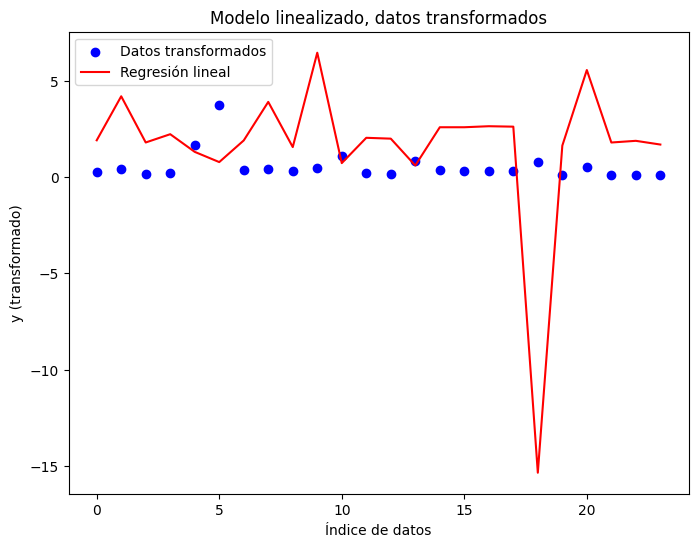

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# rango de índices para los datos
x_range = np.arange(len(y))

plt.figure(figsize=(8, 6))
plt.scatter(x_range, 1/y, color='blue', label='Datos transformados')  # Gráfico de los datos transformados
plt.plot(x_range, y_pred, color='red', label='Regresión lineal')     # Gráfico de la predicción lineal obtenida
plt.title("Modelo linealizado, datos transformados")
plt.xlabel("Índice de datos")
plt.ylabel("y (transformado)")
plt.legend()
plt.show()



Una vez obtenido mediante la linearización los thetas iniciales, ajustemos el modelo no lineal:

In [ ]:
# Definimos el modelo no lineal dado:
def modelo_no_lineal(theta, x1, x2, x3):
    theta_1, theta_2, theta_3, theta_4 = theta
    return (theta_1 * theta_2 * (x2 - x3)) / (1.632 * (1 + theta_2 * x1 + theta_3 * x2 + theta_4 * x3))

In [ ]:
# Definimos la función de error (MSE) que minimize
def funcion_error_cuadratico(theta, x1, x2, x3, y):
    # Predicciones del modelo con los parámetros actuales theta
    y_pred_no_lin = modelo_no_lineal(theta, x1, x2, x3)
    # Calculamos el error cuadrático medio, mse
    mse = np.mean((y - y_pred_no_lin) ** 2)
    return mse

# parámetros iniciales, obtenidos en la linearización del modelo
initial_params = theta_0

# con la función minimize podemos encontrar la solución:
result = minimize(funcion_error_cuadratico, initial_params, args=(x1, x2, x3, y), method='Powell')
print( result.message, result.success)


# Extraemos los parámetros ajustados
theta1, theta2, theta3, theta4 = result.x
primera_aprox=result.x
print("Parámetros ajustados:", theta1, theta2, theta3, theta4)

ultimo_valor = result.fun
print(f"Valor de la función objetivo en la última solución encontrada, es decir, con los parámetros ajustados: {ultimo_valor}")
# como estamos optimizando para minimizar el error cuadrático medio entre las predicciones del modelo y los valores reales, entocnes este será el ECM (lo veremos en unos bloques de código más abajo)

Optimization terminated successfully. True
Parámetros ajustados: -4215.409172952234 -2.352619525327158e-05 0.0009148927979508178 0.001992263747295325
Valor de la función objetivo en la última solución encontrada, es decir, con los parámetros ajustados: 1.4828844566637815


El optimizador alcanzó un mínimo dentro de los límites establecidos por los parámetros de tolerancia. Esto sugiere que el punto encontrado es al menos un óptimo local para el problema. Además es una solución factible ya que la función objetivo se minimizó hasta el punto en que el gradiente es suficientemente pequeño.Aunque la convergencia fue exitosa, no garantiza que se haya alcanzado el óptimo global.

In [ ]:
# predicción con parámetros ajustados
y_pred_no_lineal = modelo_no_lineal(result.x,x1, x2, x3)


In [ ]:
error_cuadratico = np.sum((y - y_pred_no_lineal) ** 2)
print(f"El error cuadrático del ajuste no lineal es: {error_cuadratico}")

El error cuadrático del ajuste no lineal es: 35.589226959930755


In [ ]:
error_cuadratico_medio = np.mean((y - y_pred_no_lineal) ** 2)
print(f"El error cuadrático medio del ajuste no lineal es: {error_cuadratico_medio}")


El error cuadrático medio del ajuste no lineal es: 1.4828844566637815


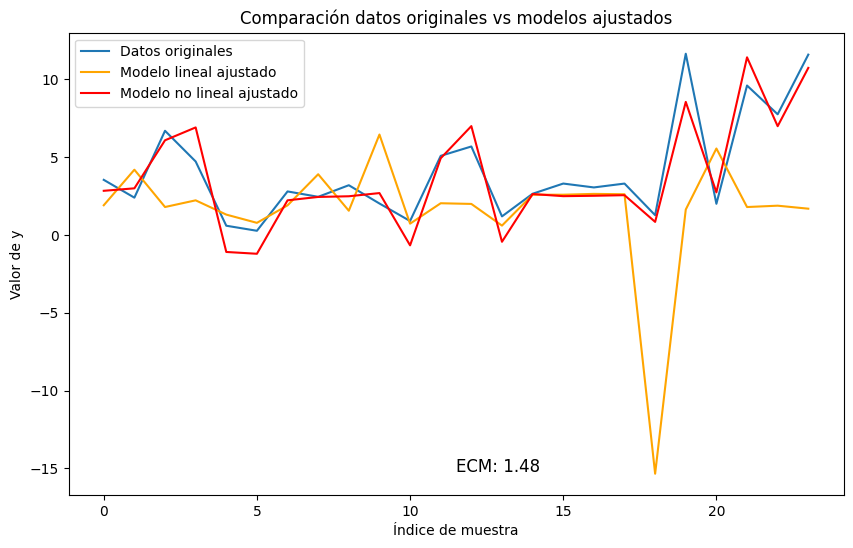

In [ ]:
# Gráfica de los modelos ajustados y los datos originales:
plt.figure(figsize=(10, 6))
plt.plot(y, label='Datos originales')
plt.plot(y_pred, label='Modelo lineal ajustado', color='orange')
plt.plot(y_pred_no_lineal, label='Modelo no lineal ajustado', color='red')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de y')
plt.title('Comparación datos originales vs modelos ajustados')
# Mostrar el ECM en la gráfica:
plt.text(0.5, 0.05,f"ECM: {error_cuadratico_medio:.2f}", transform=plt.gca().transAxes,fontsize=12, color='black')
plt.legend()
plt.show()

Aunque observando la gráfica se aprecia que el modelo no lineal se ajusta "bastante bien" a los datos, vamos a probar diferentes valores iniciales para  evaluarlos en la función objetivo y ejecutar la optimización con distintos métodos para ver si el resultado es realmente consistente, pues no sabemos si es el óptimo global.

In [ ]:
# Vamos a generar 3 puntos iniciales aleatorios cercanos al último óptimo para verificar la robustez
random.seed(42) # pero vamos a fijar la reproductividad de las variaciones que son generadas a partir de randoms
numero_de_pruebas = 3
variaciones = [primera_aprox + np.random.uniform(-0.5, 0.5, size=4) for _ in range(numero_de_pruebas)]

# Métodos de optimización que vamos a probar
metodos = ['L-BFGS-B', 'Powell', 'TNC']

# Bucle para realizar las diferentes optimizaciones con los diferentes valores iniciales:
for metodo in metodos:
    print(f"\nMétodo de optimización: {metodo}")
    for i, inicial in enumerate(variaciones, 1):
        res = minimize(funcion_error_cuadratico, inicial, args=(x1, x2, x3, y), method=metodo)
        print(f"Prueba {i} - Parámetro inicial: {inicial}")
        print(f"Solución encontrada: {res.x}")
        print(f"Valor de la función objetivo (y además, ECM): {res.fun}")
        print(f"Mensaje de convergencia: {res.message}")
        print(f"¿Convergió correctamente? {res.success}")

# Veamos si el resultado es similar al último encontrado
        if np.allclose(res.x, primera_aprox, atol=1e-3):
            print("La solución es consistente con el último resultado.\n")
        else:
            print("La solución difiere del último resultado, podría ser otro óptimo local.\n")


Método de optimización: L-BFGS-B
Prueba 1 - Parámetro inicial: [-4.21572147e+03  4.51748100e-01 -2.42191332e-01 -1.80855911e-01]
Solución encontrada: [-4.21572147e+03  4.03327005e-03 -9.52069224e-01 -1.12109506e+00]
Valor de la función objetivo (y además, ECM): 3.449042345617326
Mensaje de convergencia: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
¿Convergió correctamente? True
La solución difiere del último resultado, podría ser otro óptimo local.

Prueba 2 - Parámetro inicial: [-4.21551841e+03  2.94600906e-01  4.38124541e-01  2.94135136e-02]
Solución encontrada: [-4.21551838e+03 -2.40781436e-03  5.60221756e-01  6.57083196e-01]
Valor de la función objetivo (y además, ECM): 3.385461626798303
Mensaje de convergencia: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
¿Convergió correctamente? True
La solución difiere del último resultado, podría ser otro óptimo local.

Prueba 3 - Parámetro inicial: [-4.21502015e+03  2.63736928e-02  1.49897302e-02 -2.48587981e-01]
Solución encontrada: [

Por tanto, tras ver este resultado (nosotros hemos generado este bloque de código varias veces y se obtienen valores cuyos ECM son menores del obtenido previamente), hemos añadido la semilla para que se fijen y podamos comentar dichos resultados. Como vemos dentro del método Powell la tercera prueba es la que presenta el menor ECM (incluso penor que el de la priemra aproximación dada) cuyos valores son: $[34.77180967 , 0.46285207 , 0.43503667 , 0.21699091]$ y su $ECM= 0.63570705432045$ (ya considerando que el método converge y la solución es factible). Por tanto, la primera aproximación no es un mínimo global aunque sí local. (no hemos comprobado que este sea global, pero sí es menor que el anterior)

Comparemoslo gráficamente, a ver si la diferencia es notaria:

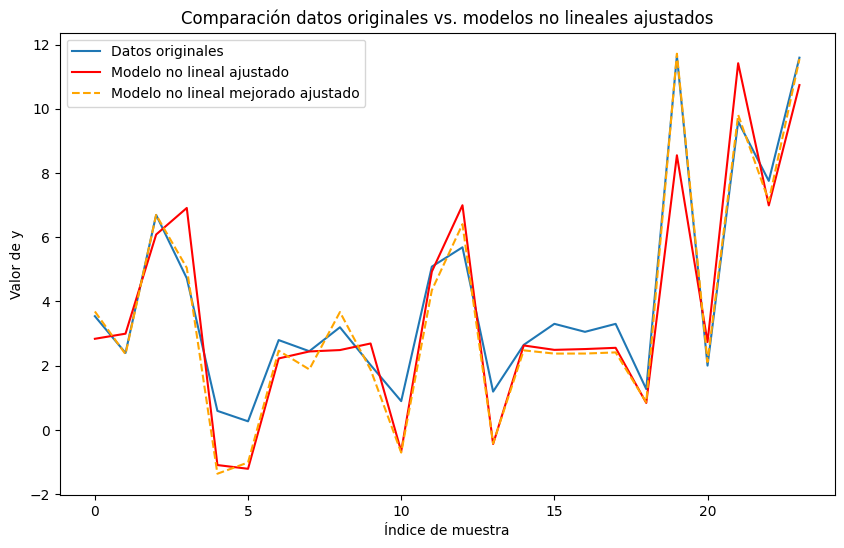

In [ ]:
resultado=[34.77180967 , 0.46285207 , 0.43503667 , 0.21699091]
y_pred_no_lineal_mejor = modelo_no_lineal(resultado,x1, x2, x3)


# Gráfica de los modelos ajustados y los datos originales:
plt.figure(figsize=(10, 6))
plt.plot(y, label='Datos originales')
plt.plot(y_pred_no_lineal, label='Modelo no lineal ajustado', color='red')
plt.plot(y_pred_no_lineal_mejor, label='Modelo no lineal mejorado ajustado', color='orange', linestyle="--")
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de y')
plt.title('Comparación datos originales vs. modelos no lineales ajustados')
plt.legend()
plt.show()

Hemos encontrado unos $\theta_i$ para el modelo no lineal dado, más ajustados y mejorados que los previamente dados y se puede comprobar mediante la representación gráfica anterior ya que este nuevo modelo se superpone a los datos originales. Aunque ya lo suponiamos pues su ECM es bastante menor.

# Ejercicio 2

Dado el conjunto de datos siguiente:

| X  | 4.5 | 5.0 | 5.1 | 5.3 | 6.2 | 7.1 |
|----|-----|-----|-----|-----|-----|-----|
| Y  | 5.0 | 3.8 | 4.9 | 3.7 | 3.6 | 15.0|

Se pide determinar la recta de regresión $ Y = \alpha + \beta X $ minimizando los siguientes criterios:

1. La suma del error cuadrático: $ \sum_{i=1}^n ϵ_i^2 = \sum_{i=1}^n (y_i - \alpha - \beta x_i)^2 $.
2. La suma del valor absoluto de los errores: $ \sum_{i=1}^n |y_i - \alpha - \beta x_i| $.
3. El máximo valor absoluto de los errores: $ \max |y_i - \alpha - \beta x_i| $.

Resolver con Python los tres problemas y representar las tres rectas de regresión para ilustrar las diferencias.

In [ ]:
# Primero vamos a cargar los datos
X = np.array([4.5, 5.0, 5.1, 5.3, 6.2, 7.1])
Y = np.array([5.0, 3.8, 4.9, 3.7, 3.6, 15.0])
n=len(X)

In [ ]:
# Apartado a): Minimización de la suma de los errores cuadráticos

X = X.reshape(-1, 1)
regresion = LinearRegression().fit(X, Y)
alpha_a = regresion.intercept_
beta_a = regresion.coef_[0]
alpha_a, beta_a

(-13.358456973293766, 3.498516320474778)

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 37.2 MB/s eta 0:00:00


In [ ]:
import pulp as plp

In [ ]:
# Apartado b) : Minimización de la suma del valor absoluto de los errores

n = len(X) # número de datos

modelo= plp.LpProblem("Minimizar_errores_absolutos", plp.LpMinimize)

# Definir variables
alpha = plp.LpVariable("alpha", lowBound=None, upBound=None) # coeficiente de la recta de regresión
beta = plp.LpVariable("beta", lowBound=None, upBound=None) # coeficiente de la recta de regresió
errors = [plp.LpVariable(f"error_{i}", lowBound=0) for i in range(n)] # errors es una lista de variables que representan los errores absolutos para cada punto de datos.

# Función objetivo: Minimizar la suma de los errores absolutos
modelo += plp.lpSum(errors)

# Restricciones para cada punto de datos
for i in range(n):
    modelo += Y[i] - (alpha + beta * X[i]) <= errors[i]
    modelo += (alpha + beta * X[i]) - Y[i] <= errors[i]

# Resolver el problema
modelo.solve()

# Obtener los resultados
alpha_opt = alpha.varValue
beta_opt = beta.varValue

alpha_opt, beta_opt

(-22.866667, 5.3333333)

In [ ]:
apartado_c = plp.LpProblem("Regresion_Linfinity", plp.LpMinimize)

# Variables
alpha = plp.LpVariable("alpha", lowBound=None)
beta = plp.LpVariable("beta", lowBound=None)
max_error = plp.LpVariable("max_error", lowBound=0)

# Función objetivo: minimizar el máximo error
apartado_c += max_error

# Restricciones: |y_i - (alpha + beta * x_i)| <= max_error
for i in range(len(X)):
    apartado_c += Y[i] - (alpha + beta * X[i]) <= max_error
    apartado_c += -(Y[i] - (alpha + beta * X[i])) <= max_error

apartado_c.solve()

# Resultados
alpha_opt_max= alpha.varValue
beta_opt_max = beta.varValue
print("alpha:", alpha.varValue)
print("beta:", beta.varValue)
print("Máximo error absoluto:", max_error.varValue)

alpha: -16.276923
beta: 3.8461538
Máximo error absoluto: 3.9692308


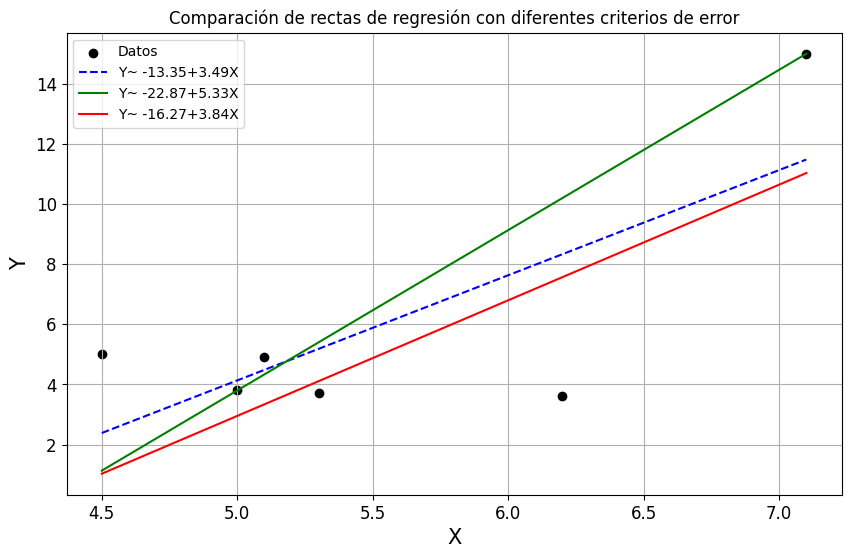

In [ ]:
# Calcular los valores predichos para cada modelo
Y_2_1 = alpha_a + beta_a * X
Y_2_2 = alpha_opt + beta_opt * X
Y_2_3 = alpha_opt_max + beta_opt_max * X

# Graficar los puntos y las tres rectas de regresión
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, Y, label='Datos', color='black')
# Rectas de regresión
ax.plot(X, Y_2_1, label='Y~ -13.35+3.49X', color='blue', linestyle = '--')
ax.plot(X, Y_2_2, label='Y~ -22.87+5.33X', color='green')
ax.plot(X, Y_2_3, label='Y~ -16.27+3.84X', color='red')

# Etiquetas y leyenda
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend()
ax.grid()
plt.title("Comparación de rectas de regresión con diferentes criterios de error")
plt.show()

En primer lugar se observa que el punto (X=7.1,Y=15.0) parece ser un valor atípico o "*outlier*", ya que está bastante alejado de la tendencia general de los otros puntos.

Además, podemos apreciar que la recta azul (minimización de los errores cuadráticos) y la recta roja (minimización del máximo valor absoluto de los errores) tienen pendientes similares y más moderadas, por lo que se puede deducir que estos métodos no son tan sensibles a las observaciones atípicas y que por ello se ajustan de manera más uniforme a todos los puntos.

Además, minimización del máximo valor absoluto de los errores intenta minimizar el peor error posible, distribuyendo así el ajuste de forma más uniforme entre todos los puntos, siendo la menos inclinada de las tres. De esta manera no permite que un solo punto influya desproporcionadamente en el ajuste de la línea.

Por otro lado, la recta verde (minimización del valor absoluto de los errores) presenta una pendiente bastante más pronunciada, centrándose bastante en estos valores extremos.







